In [1]:
import sys
import os
import glob as gb
sys.path.append('/home/cbenitez/')
import MTmp as mt
import matplotlib.pyplot as plt
import numpy as np
import oort_cons as oc

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


In [2]:
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
from scipy.interpolate import griddata

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [3]:
ls /fs/nas14/other0/cbenitez/partsSim

info_mp_marbles_14032021-122643  mp_marbles_14032021-122643_script.py
info_mp_marbles_15032021-003752  mp_marbles_15032021-003752
mp_marbles_14032021-122643       mp_marbles_15032021-003752LSR
mp_marbles_14032021-122643LSR    mp_marbles_15032021-003752_script.py


In [4]:
DFparts,DFlsrs = mt.read_dat("/fs/nas14/other0/cbenitez/partsSim/",'mp_marbles_15032021-003752') 

In [5]:
DFparts.creation_time=DFparts.creation_time*mt.C.s.express(mt.C.Myr)
DFlsrs.creation_time=DFlsrs.creation_time*mt.C.s.express(mt.C.Myr)

In [6]:
np.unique(DFparts["output"])

array([11, 12, 13, 14, 15, 16])

In [7]:
tt = np.unique(DFparts.creation_time)

In [8]:
tt

array([ 3.25060325,  4.7216629 ,  6.45561442,  7.98573204,  9.55898311,
       11.13404672])

In [9]:
delta_grid = 0.030000005651420025

In [10]:
opc = 14
itc = opc-11
#df = DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[itc]) & (abs(DFparts.z)<.07)]
#df = DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[itc])]
df = DFparts[(DFparts["output"]==opc)]

In [11]:
len(df)

6535

In [12]:
#n_voxels = 2*int(max((-df['x'].min()+df['x'].max())/delta_grid,(-df['y'].min()+df['y'].max())/delta_grid,(-df['z'].min()+df['z'].max())/delta_grid))  
#x, y, z = np.indices((n_voxels, n_voxels,n_voxels))
nx_voxels,ny_voxels,nz_voxels = (int((-df['x'].min()+df['x'].max())/delta_grid))+1,\
                                (int((-df['y'].min()+df['y'].max())/delta_grid))+1,\
                                (int((-df['z'].min()+df['z'].max())/delta_grid))+1  
x, y, z = np.indices((nx_voxels, ny_voxels,nz_voxels))
where_on_x = map(int,(df['x']-df['x'].min())/delta_grid)
where_on_y = map(int,(df['y']-df['y'].min())/delta_grid)
where_on_z = map(int,(df['z']-df['z'].min())/delta_grid)
voxels_bool = np.zeros_like(x,dtype=bool)
voxels_bool[where_on_x,where_on_y,where_on_z] = True

In [15]:
min_dens = 2.5
max_dens = 13.5
alpha_min = .01
alpha_max = 1
#min_dens = df.dens.min()
#max_dens = df.dens.max()
voxels_dens = np.zeros(voxels_bool.shape)
voxels_alpha = np.zeros(voxels_bool.shape)
#voxels_dens[where_on_x,where_on_y,where_on_z] = (df['dens']-df['dens'].min())/(df['dens'].max()-df['dens'].min())
#voxels_alpha[where_on_x,where_on_y,where_on_z] = ((df['dens']-df['dens'].min())/(df['dens'].max()-df['dens'].min())+alpha_min/(alpha_max-alpha_min))*(alpha_max-alpha_min)
voxels_dens[where_on_x,where_on_y,where_on_z] = (df['dens']-min_dens)/max_dens
voxels_alpha[where_on_x,where_on_y,where_on_z] = ((df['dens']-min_dens)/max_dens+alpha_min/(alpha_max-alpha_min))*(alpha_max-alpha_min)
colors = plt.cm.viridis(voxels_dens)
colors[:,:,:,3] = voxels_alpha

In [16]:
x2, y2, z2 = np.indices((nx_voxels+1, ny_voxels+1,nz_voxels+1))
X = x2*delta_grid+df['x'].min()-delta_grid/2
Y = y2*delta_grid+df['y'].min()-delta_grid/2
Z = z2*delta_grid+df['z'].min()-delta_grid/2
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
Sb=1.

Xb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten()) + 0.5*(X.max()+X.min())
Yb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten()) + 0.5*(Y.max()+Y.min())
Zb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten()) + 0.5*(Z.max()+Z.min())



In [32]:
def arg2plot_t(opc,min_dens=2.5,max_dens=9,alpha_min=.01,alpha_max=1):
    itc = opc-11
    #df = DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[itc]) & (abs(DFparts.z)<.07)]
    #df = DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[itc])]
    df = DFparts[(DFparts["output"]==opc)]
    
    nx_voxels,ny_voxels,nz_voxels = (int((-df['x'].min()+df['x'].max())/delta_grid))+1,\
                                    (int((-df['y'].min()+df['y'].max())/delta_grid))+1,\
                                    (int((-df['z'].min()+df['z'].max())/delta_grid))+1  
    x, y, z = np.indices((nx_voxels, ny_voxels,nz_voxels))
    where_on_x = map(int,(df['x']-df['x'].min())/delta_grid)
    where_on_y = map(int,(df['y']-df['y'].min())/delta_grid)
    where_on_z = map(int,(df['z']-df['z'].min())/delta_grid)
    voxels_bool = np.zeros_like(x,dtype=bool)
    voxels_bool[where_on_x,where_on_y,where_on_z] = True
    #min_dens = df.dens.min()
    #max_dens = df.dens.max()
    voxels_dens = np.zeros(voxels_bool.shape)
    voxels_alpha = np.zeros(voxels_bool.shape)
    #voxels_dens[where_on_x,where_on_y,where_on_z] = (df['dens']-df['dens'].min())/(df['dens'].max()-df['dens'].min())
    voxels_alpha[where_on_x,where_on_y,where_on_z] = ((df['dens']-df['dens'].min())/(df['dens'].max()-df['dens'].min())+alpha_min/(alpha_max-alpha_min))*(alpha_max-alpha_min)
    voxels_dens[where_on_x,where_on_y,where_on_z] = (df['creation_time']-tt[0])/(tt[3]-tt[0])
    #voxels_alpha[where_on_x,where_on_y,where_on_z] = ((df['dens']-min_dens)/max_dens+alpha_min/(alpha_max-alpha_min))*(alpha_max-alpha_min)
    colors = plt.cm.plasma(voxels_dens)
    colors[:,:,:,3] = voxels_alpha
    x2, y2, z2 = np.indices((nx_voxels+1, ny_voxels+1,nz_voxels+1))
    X = x2*delta_grid+df['x'].min()-delta_grid/2
    Y = y2*delta_grid+df['y'].min()-delta_grid/2
    Z = z2*delta_grid+df['z'].min()-delta_grid/2
    
    return X,Y,Z,voxels_alpha,colors

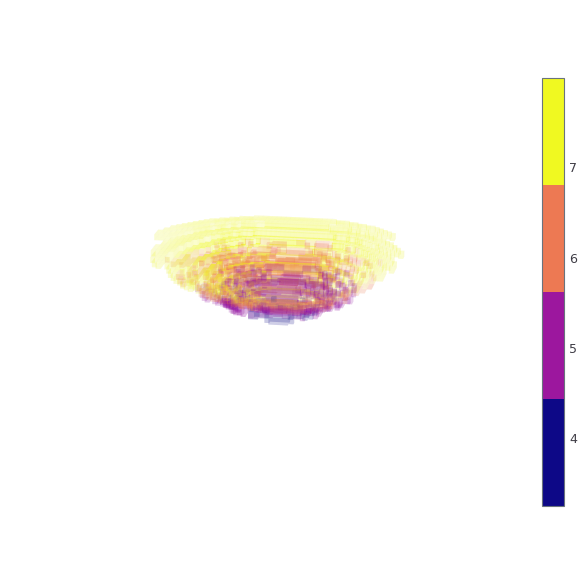

In [34]:
min_dens=2.5
max_dens=13.5
alpha_min=.1
alpha_max=1
vvox = [arg2plot_t(op,min_dens=min_dens,max_dens=max_dens,alpha_min=alpha_min,alpha_max=alpha_max) for op in [14]]
max_range = np.array([vvox[-1][0].max()-vvox[-1][0].min(), vvox[-1][1].max()-vvox[-1][1].min(), vvox[-1][2].max()-vvox[-1][2].min()]).max()
Sb=1.
Xb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten()) + 0.5*(vvox[-1][0].max()+vvox[-1][0].min())
Yb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten()) + 0.5*(vvox[-1][1].max()+vvox[-1][1].min())
Zb = Sb*(0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten()) + 0.5*(vvox[-1][2].max()+vvox[-1][2].min())
norm = cm.colors.Normalize(tt[0], tt[3])
azim_cam, alt_cam = 15,280

fig,axs = plt.subplots(1,1,figsize=(8,8),subplot_kw=dict(projection='3d'),constrained_layout=True)
#axsf = axs.flat
axsf = [axs]
for i in range(len(axsf)):
    #im = axsf[i].imshow(a_zz[i],extent=a_extentto[i],vmin=a_zlims[0], vmax=a_zlims[1],origin='lower',norm=LogNorm())

    vox = axsf[i].voxels(vvox[i][0],vvox[i][1],vvox[i][2],vvox[i][3],facecolors=vvox[i][4])
    for xb, yb, zb in zip(Xb, Yb, Zb):
        axsf[i].plot([xb], [yb], [zb], 'w')
    #axsf[i].set_xlabel(a_xlab,fontsize=fontsize)
    #axsf[i].set_ylabel(a_ylab,fontsize=fontsize)
    ##cbar = fig.colorbar(im,shrink = shrink)
    #axsf[i].set_xlim(a_xlims[0],a_xlims[1])
    #axsf[i].set_ylim(a_ylims[0],a_ylims[1])
    #axsf[i].tick_params(which='major',direction='in',right=True,top=True,length=8,labelsize=fontsize*.8,color='white')
    #axsf[i].minorticks_on()
    #axsf[i].tick_params(which='minor',direction='in',right=True,top=True,length=5,color='white')
    axsf[i].axis('off')
    axsf[i].grid(b=None)
    axsf[i].view_init(azim_cam, alt_cam)

cmap = plt.get_cmap('plasma', 4)
m = cm.ScalarMappable(cmap=cmap,norm=norm)
m.set_array([])
fig.colorbar(m,shrink=.75)
    
plt.show()




